### Import all Libraries

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
uploaded = files.upload()
filename = next(iter(uploaded))

Saving Restaurant_tips.csv to Restaurant_tips.csv


### Create a DataFrame

In [3]:
restaurantData = pd.read_csv(filename)

In [4]:
restaurantData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
restaurantData.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### To study the dataset

1. Read dataset.csv and give DataFrame name as tips
2. Study dataset
  1. Display only column names
  1. Display the types of attributes
  1. Check whether there is any null present? Show count
  1. Show min, max, mean, standard deviation etc.
  1. In connection with d, display it only for object type data.
  1. Display unique values of each column separately.
    1. Also display count.
  1.

### Read dataset.csv and give DataFrame name as tips

In [6]:
restaurantData.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Display only column names

In [7]:
restaurantData.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

### 2. Display the types of attributes

In [8]:
restaurantData.dtypes

,0
total_bill,float64
tip,float64
sex,object
smoker,object
day,object
time,object
size,int64


### 3. Check whether there is any null present? Show count

In [9]:
restaurantData.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


### 4. Show min, max, mean, standard deviation etc.

In [10]:
restaurantData.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### 5. In connection with restaurantData, display it only for object type data.

In [11]:
restaurantData.describe(include='O')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


### 6. Display unique values of each column separately. Also display count

In [12]:
restaurantData.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
restaurantData.time.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [14]:
restaurantData.time.value_counts()

,count
time,
Dinner,176
Lunch,68


In [15]:
for column in restaurantData.columns:
    print(f"Unique values for {column}:")
    print(restaurantData[column].unique())
    print(f"Count of unique values for {column}:")
    print(restaurantData[column].value_counts())
    print("\n" + "-"*50 + "\n")

Unique values for total_bill:
[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 13.81 11.02 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07 26.86 25.28
 14.73 10.51 27.2  22.76 17.29 19.44 16.66 10.07 32.68 15.98 34.83 13.03
 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17 27.28 12.03 12.46
 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21 18.24 14.31 14.    7.25
 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08 11.69 13.42 14.26 15.95
 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27 11.17 12.26 18.26  8.51
 14.15 16.   13.16 17.47 34.3  41.19 27.05 16.43  8.35 18.64 11.87  9.78
  7.51 14.07 13.13 17.26 24.55 19.77 29.85 48.17 25.   13.39 16.49 21.5
 12.66 16.21 17.51 24.5

### 7. Show the count of Males and Females who smoke.

In [16]:
smoker_df = pd.crosstab(restaurantData.sex, restaurantData.smoker)
smoker_df

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


### 8. Show pairwise bivariate distributions.

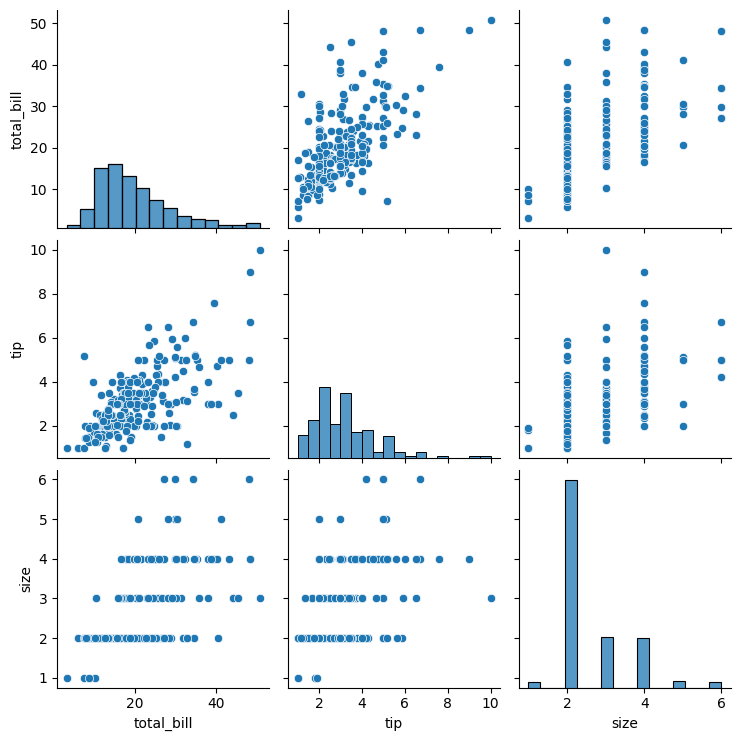

In [17]:
seaborn.pairplot(restaurantData)

### Display following scatter plot with xlabel and ylabel

<Axes: xlabel='Total Bill', ylabel='Tip'>

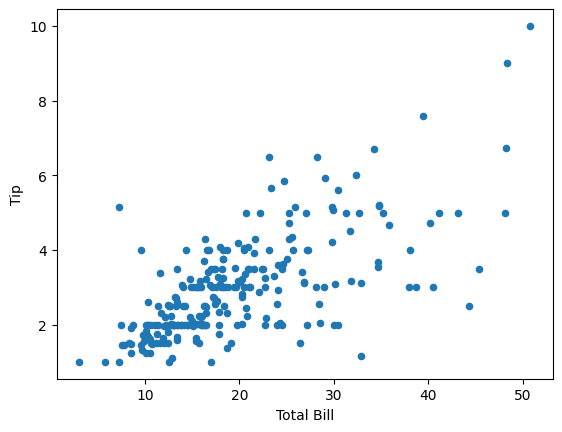

In [18]:
restaurantData.plot(kind='scatter', x='total_bill', y='tip', xlabel='Total Bill', ylabel='Tip')

### Encode Data

1. sex frmale(0) male(1)
2. smoker no(0) yes(1)
3. time lunch(0) dinner(1)
4. day thur(0), fri(1), sat(2), sun(3)

In [19]:
restaurantData.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [20]:
restaurantData.sex = restaurantData.sex.replace({'Female': 0, 'Male': 1})
restaurantData.smoker = restaurantData.smoker.replace({'No': 0, 'Yes': 1})
restaurantData.time = restaurantData.time.replace({'Lunch': 0, 'Dinner': 1})
restaurantData.day = restaurantData.day.replace({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})

### Display first 5 records

In [21]:
restaurantData.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


### Display data correlation

In [22]:
restaurantData.corr()

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.675734,0.144877,0.085721,0.173693,0.183118,0.598315
tip,0.675734,1.000000,0.088862,0.005929,0.135499,0.121629,0.489299
sex,0.144877,0.088862,1.000000,0.002816,0.230791,0.205231,0.086195
smoker,0.085721,0.005929,0.002816,1.000000,-0.032653,0.054921,-0.133178
day,0.173693,0.135499,0.230791,-0.032653,1.000000,0.874366,0.165350
time,0.183118,0.121629,0.205231,0.054921,0.874366,1.000000,0.103411
size,0.598315,0.489299,0.086195,-0.133178,0.165350,0.103411,1.000000


### Display heatmap

<Axes: >

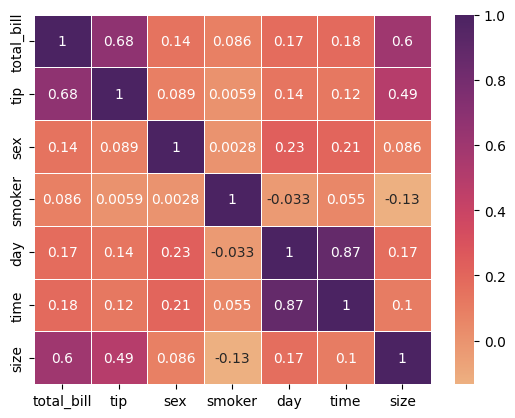

In [23]:
seaborn.heatmap(restaurantData.corr(), cmap='flare', linewidths=0.5, annot=True)

### Defineinput x and target/output y

In [24]:
X = restaurantData.drop('tip', axis=1)
y = restaurantData['tip']

In [25]:
X

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,3,1,2
1,10.34,1,0,3,1,3
2,21.01,1,0,3,1,3
3,23.68,1,0,3,1,2
4,24.59,0,0,3,1,4
...,...,...,...,...,...,...
239,29.03,1,0,2,1,3
240,27.18,0,1,2,1,2
241,22.67,1,1,2,1,2
242,17.82,1,0,2,1,2


In [26]:
y

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Apply Standardization

$
z = \frac{x - \mu}{\sigma}
$


In [28]:
sc = StandardScaler()

In [29]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

### Assignment Question


**Why don't we apply standardize on y_train**

### Build a regression model

In [32]:
model = linear_model.LinearRegression()

In [33]:
model.fit(X_train_scaled, y_train)

LinearRegression()

### Dsiplay different Testing errors

In [34]:
y_pred = model.predict(X_test_scaled)

In [35]:
print("Testing Errors")
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2 Square: ", r2_score(y_test, y_pred))

Testing Errors
MAE:  0.6685728160722875
MSE:  0.6963090766605352
R2 Square:  0.44293996874898955


### Dsiplay different Training errors

In [36]:
y_train_pred = model.predict(X_train)

In [37]:
print("Training Errors")
print("MAE: ", mean_absolute_error(y_train, y_train_pred))
print("MSE: ", mean_squared_error(y_train, y_train_pred))
print("R2 Square: ", r2_score(y_train, y_train_pred))

Training Errors
MAE:  17.30133882512537
MSE:  341.54696753037933
R2 Square:  -167.10834077208787
